In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pint
import utilities as util
import deck_classes as dc

In [2]:
ureg = pint.UnitRegistry()
ureg.load_definitions('./units/lwfa_def.txt')

In [3]:
# parameters from EPOCH input file

# lengths in micrometers
# times in femtoseconds
# densities in 1/cm**3

# plasma up ramp length
url = 100 * ureg.micrometer
# plasma flat-top length
ftl = 2450 * ureg.micrometer
# plasma skin depth
psd = 2.6575 * ureg.micrometer

# grid resolution
cells_x = 1024
cells_y = 96
cells_z = 96

# moving box limits
x_min = -100 * ureg.micrometer
x_max = -50 * ureg.micrometer
#
y_min = -400 * ureg.micrometer
y_max =  400 * ureg.micrometer
#
z_min = -400 * ureg.micrometer
z_max =  400 * ureg.micrometer

# speed of the window
window_v_x =   0.29919287308 * ureg.micrometer/ureg.femtosecond
# time at which the window should start moving
window_start_time =  166.78204759999997 * ureg.femtosecond

# final simulation time
t_end =  9041.7551465 * ureg.femtosecond

In [4]:
p_min = dc.Point(x_min, y_min, z_min)
p_max = dc.Point(x_max, y_max, z_max)

shape = (cells_x, cells_y, cells_z)
ncells = dc.NrGridPoints(*shape)
winprop = dc.WindowProp(window_v_x, window_start_time, t_end)

mw = dc.MovingWindow(winprop, p_min, p_max, ncells)
dom = dc.Domain(mw)
preplasma = dc.Plasma(psd, url, ftl)
electron = dc.Species(dom, preplasma, 1e-3)

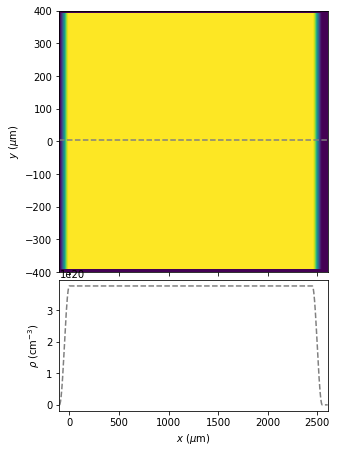

In [5]:
pm = {'cmap':'viridis', 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$y$ ($\mu$m)', 'zlabel':r'$\rho$ (cm$^{-3}$)', 'cbar':False}
so = {'ls': '--', 'color': '0.5'}
fig = util.plot2d_wslice(np.sum(electron.rho, axis=2), dom.box.x, dom.box.y, pm, so)

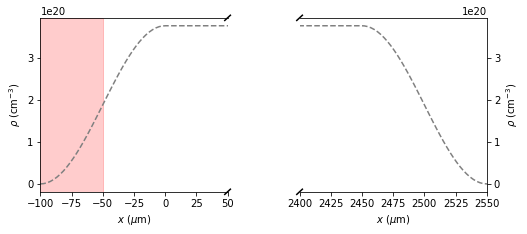

In [6]:
fig, ax = plt.subplots(figsize=(8, 3.2))
xr = dom.box.x[-1]
pm = {'xlim_left':(-preplasma.url.magnitude, 0 + 50), 'xlim_right':(preplasma.ftl.magnitude - 50, preplasma.url.magnitude + preplasma.ftl.magnitude), 'xlabel':r'$x$ ($\mu$m)', 'ylabel':r'$\rho$ (cm$^{-3}$)'}
so = {'ls': '--', 'color': '0.5'}
r = np.sum(electron.rho, axis=2)
i = r.shape[0]//2
util.plot1d_break_x(fig, dom.box.x, r[i], pm, so)
ax.axvspan(mw.box.x[0], mw.box.x[-1], alpha = 0.2, color='red');

/home/berceanu/miniconda3/envs/scipy/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


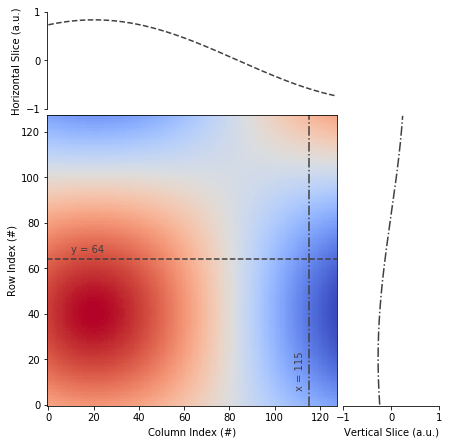

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec  # only for Method 2

# A lot of information about GridSpec can be found here:
# https://matplotlib.org/tutorials/intermediate/gridspec.html

# Dummy data
uu = np.linspace(0, np.pi, 128)
data = np.cos(uu - 0.5) * np.cos(uu.reshape((-1, 1)) - 1.0)

# Figure with three axes of different width and height. Axis-sharing
# is used to make easier interactive exploration but could perfectly
# be removed if not needed.
#
# Method 1: pass GridSpec kwargs to the helper function plt.subplots
#fig, axs = plt.subplots(
#                2, 2, figsize=(6.4, 6.4), sharex='col', sharey='row',
#                gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [3, 1]})
#((axh, ax_), (ax0, axv)) = axs  # mostly to have the same names with Method 2
#ax_.set_visible(False)  # hide the useless (bottom right) Axes
#
# Method 2: set up a GridSpec grid and add the desired Axes one by one
fig = plt.figure(figsize=(6.4, 6.4))
gs = GridSpec(2, 2, height_ratios=[1, 3], width_ratios=[3, 1])
ax0 = fig.add_subplot(gs[1, 0])
axh = fig.add_subplot(gs[0, 0], sharex=ax0)
axv = fig.add_subplot(gs[1, 1], sharey=ax0)

# Where are the slices and how to display them
hslice_pos = data.shape[0] // 2  # vertical half of the picture
vslice_pos = 9 * data.shape[1] // 10  # horizontal 9/10 of the picture
hslice_opts = {'ls': '--', 'color': '0.25'}
vslice_opts = {'ls': '-.', 'color': '0.25'}

# Imshow global view. Some documentation about imshow:
# https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html
im = ax0.imshow(data, origin='bottom', aspect='auto', cmap='coolwarm')
ax0.set_ylabel('Row Index (#)')
ax0.set_xlabel('Column Index (#)')

# Just to show where the slices are done. Another example in Matplotlib
# gallery about the relevant functions:
# https://matplotlib.org/gallery/subplots_axes_and_figures/axhspan_demo.html
ax0.axhline(hslice_pos, **hslice_opts)
ax0.axvline(vslice_pos, **vslice_opts)
# One can also annotate the slice markers. More information
# about `ax.annotate` here:
# https://matplotlib.org/tutorials/text/annotations.html
ax0.annotate('y = {}'.format(hslice_pos), xy=(10, hslice_pos + 3),
             xycoords='data', color=hslice_opts['color'])
ax0.annotate('x = {}'.format(vslice_pos), xy=(vslice_pos - 6, 20),
             xycoords='data', color=hslice_opts['color'], rotation='vertical')

# Horizontal Slice Profile
axh.set_xmargin(0)  # otherwise ax0 may have white margins
axh.set_ylabel('Horizontal Slice (a.u.)')
axh.plot(range(data.shape[1]), data[hslice_pos], **hslice_opts)
axh.set_ylim(-1, 1)
axh.set_yticks([-1, 0, 1])
# NB: More examples of fancy customisation of ticks and formatters here:
# https://matplotlib.org/gallery/ticks_and_spines/tick-locators.html
# https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html

# Vertical Slice Profile
axv.set_ymargin(0)  # otherwise ax0 may have white margins
axv.set_xlabel('Vertical Slice (a.u.)')
axv.plot(data[vslice_pos], range(data.shape[0]), **vslice_opts)
axv.set_xlim(-1, 1)
axv.set_xticks([-1, 0, 1])

# "Despine" the slice profiles and hide the relevant axis
for ax, spines in ((axh, ('top', 'bottom', 'right')),
                   (axv, ('top', 'left', 'right'))):
    for sp in spines:
        ax.spines[sp].set_visible(False)
axh.xaxis.set_visible(False)
axv.yaxis.set_visible(False)

# Tweak a bit the figure layout
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)

fig.show()